In [1]:
%time
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import cross_validation
from sklearn import preprocessing

m_font_size = 20

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs


/Users/natmourajr/.virtualenvs/demonenv/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


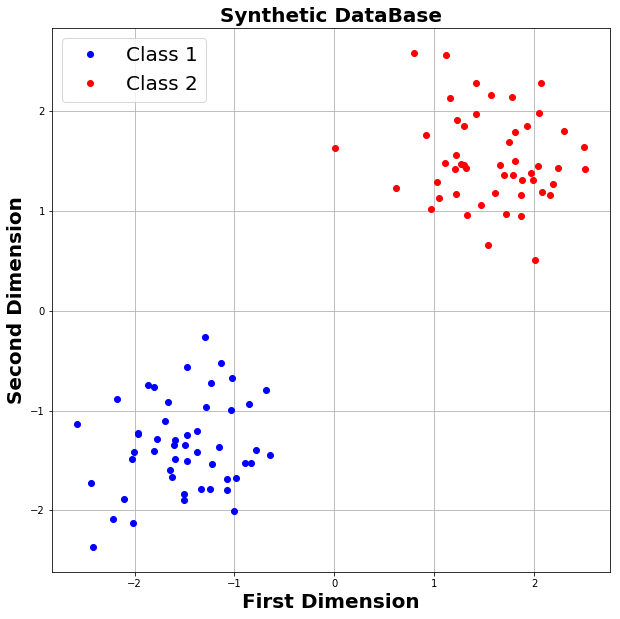

In [2]:
%time
# Create Data
n_events = 50

# dados em 45^o
angle = np.pi/2
rotation_matrix = [[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]]

m_means = [-1.5,1.5]
m_vars = [0.5,0.5]

data_c1 = m_vars*np.random.randn(n_events,2)+m_means
data_c1 = np.inner(data_c1,rotation_matrix)

m_means = [1.5,-1.5]
m_vars = [0.5,0.5]

data_c2 = m_vars*np.random.randn(n_events,2)+m_means
data_c2 = np.inner(data_c2,rotation_matrix)

data = np.append(data_c1, data_c2,axis=0)
trgt = np.append(np.zeros(data_c1.shape[0]),np.ones(data_c2.shape[0]),axis=0)

# plot data
%matplotlib inline  

fig = plt.figure(figsize=(10,10))

plt.plot(data[trgt==0,0],data[trgt==0,1],'bo',label='Class 1')
plt.plot(data[trgt==1,0],data[trgt==1,1],'ro',label='Class 2')

plt.legend(fontsize=m_font_size)
plt.grid()
plt.title('Synthetic DataBase',fontweight='bold',fontsize=m_font_size)
plt.xlabel('First Dimension',fontweight='bold',fontsize=m_font_size)
plt.ylabel('Second Dimension',fontweight='bold',fontsize=m_font_size)
#limits = [-5, 5]
#plt.xlim(limits)
#plt.ylim(limits)

In [10]:
from ARTNet import TrnParams, ARTNet

trn_params = TrnParams()

trn_params.learning_rate = 0.01

art_obj = ARTNet(similarity_radius=1.0)
art_obj.fit(data,trn_params=trn_params)


Class ARTNet TrnParams
Learning Rate: 0.01000
Verbose: False
Number of events: 100


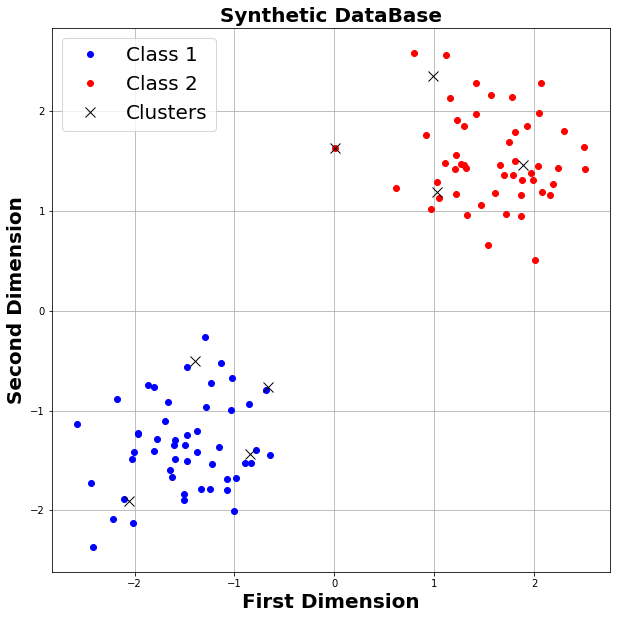

In [11]:
# plot data
%matplotlib inline  

fig = plt.figure(figsize=(10,10))

plt.plot(data[trgt==0,0],data[trgt==0,1],'bo',label='Class 1')
plt.plot(data[trgt==1,0],data[trgt==1,1],'ro',label='Class 2')

plt.plot(art_obj.clusters[:,0],art_obj.clusters[:,1],'kx',label='Clusters',markersize=10)

plt.legend(fontsize=m_font_size)
plt.grid()
plt.title('Synthetic DataBase',fontweight='bold',fontsize=m_font_size)
plt.xlabel('First Dimension',fontweight='bold',fontsize=m_font_size)
plt.ylabel('Second Dimension',fontweight='bold',fontsize=m_font_size)



In [5]:
art_obj.clusters.shape

(2, 2)